In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
air_pollutions_df = pd.read_excel('../data/national_state_sector_2002_2024_caps_21feb2025_tons (1).xlsx', sheet_name='State')

In [4]:
air_pollutions_df.head(2)

,State FIPS,State,Pollutant,Sector,emissions2002,emissions2003,emissions2004,emissions2005,emissions2006,emissions2007,...,emissions2015,emissions2016,emissions2017,emissions2018,emissions2019,emissions2020,emissions2021,emissions2022,emissions2023,emissions2024
0,1,AL,Black Carbon,Agriculture - Crops & Livestock Dust,186.911689,192.755284,184.744382,181.600073,176.485625,176.472545,...,165.032132,171.476645,177.730086,182.751299,180.776253,179.027200,179.027234,173.883152,173.883152,173.883152
1,1,AL,Black Carbon,Fuel & Services - Gasoline Terminals,0.007700,0.007700,0.007700,0.007700,0.007700,0.007700,...,0.007700,0.007700,0.007700,0.007700,0.007700,0.007511,0.007082,0.006873,0.006873,0.006873


In [5]:
air_pollutions_df[['Sector', 'Category', 'Subcategory']] = (
    air_pollutions_df['Sector']
    .str
    .split('-', n=2, expand=True)
)

In [6]:
air_pollutions_df.head()

,State FIPS,State,Pollutant,Sector,emissions2002,emissions2003,emissions2004,emissions2005,emissions2006,emissions2007,...,emissions2017,emissions2018,emissions2019,emissions2020,emissions2021,emissions2022,emissions2023,emissions2024,Category,Subcategory
0,1,AL,Black Carbon,Agriculture,186.911689,192.755284,184.744382,181.600073,176.485625,176.472545,...,177.730086,182.751299,180.776253,179.027200,179.027234,173.883152,173.883152,173.883152,Crops & Livestock Dust,None
1,1,AL,Black Carbon,Fuel & Services,0.007700,0.007700,0.007700,0.007700,0.007700,0.007700,...,0.007700,0.007700,0.007700,0.007511,0.007082,0.006873,0.006873,0.006873,Gasoline Terminals,None
2,1,AL,Black Carbon,Fuel & Services,38.416900,38.416900,38.416900,38.416900,38.093000,38.093000,...,39.815800,39.815800,39.815800,92.172021,92.088614,92.088614,92.088614,92.088614,Commercial Cooking,None
3,1,AL,Black Carbon,Dust,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Construction Dust,None
4,1,AL,Black Carbon,Dust,49.204652,45.977755,50.477153,53.880845,50.906936,67.234186,...,64.094491,57.509753,65.910076,53.003271,42.214994,49.981178,49.981178,49.981178,Paved Road Dust,None


In [7]:
air_pollutions_df['Category'].unique()

array([' Crops & Livestock Dust', ' Gasoline Terminals',
       ' Commercial Cooking', ' Construction Dust', ' Paved Road Dust',
       ' Unpaved Road Dust', ' Agricultural Field Burning',
       ' Prescribed Fires', ' Wildfires', ' Comm/Institutional ',
       ' Electric Generation ', ' Industrial Boilers ', ' Residential ',
       ' Gas Stations', ' Cement Manufacturing',
       ' Chemical Manufacturing', ' Iron & Steel Industry', ' Mining',
       ' Other Industrial Processes', ' Aluminum & Other Metals',
       ' Oil & Gas Production', ' Petroleum Refineries', ' Pulp & Paper',
       ' Storage and Transfer', None, ' Aircraft', ' Marine Transport',
       ' Rail Transport', ' Off Road Equipment ', ' On Road Vehicles ',
       ' Degreasing', ' Dry Cleaning', ' Graphic Arts',
       ' Industrial Coating & Solvent Use', ' Fertilizer Application',
       ' Livestock Waste', ' Consumer & Commercial Solvent Use', ' Non'],
      dtype=object)

In [8]:
air_pollutions_df['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR', 'VI', 'TB'],
      dtype=object)

In [9]:
states_df = pd.read_csv('../data/states_boundries_updated.csv')
states_df.head()
df_states= states_df.rename(columns={'STUSPS' : 'State'})
#df_states.head()

In [10]:
merged_df = pd.merge(air_pollutions_df, df_states, on='State', how='inner' )
merged_df.shape

(24379, 33)

In [11]:
airpollution_df = merged_df[['State', 'NAME', 'Pollutant', 'Sector','Category', 'Subcategory', 'emissions2002', 'emissions2003', 'emissions2004', 'emissions2005','emissions2006','emissions2007',
          'emissions2008', 'emissions2009','emissions2010','emissions2011','emissions2012','emissions2013','emissions2014','emissions2015','emissions2016',
          'emissions2017','emissions2018','emissions2019','emissions2020','emissions2021','emissions2022', 'emissions2023', 'emissions2024','INTPTLAT','INTPTLON']]

In [12]:
airpollution_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,emissions2002,emissions2003,emissions2004,emissions2005,...,emissions2017,emissions2018,emissions2019,emissions2020,emissions2021,emissions2022,emissions2023,emissions2024,INTPTLAT,INTPTLON
0,AL,Alabama,Black Carbon,Agriculture,Crops & Livestock Dust,None,186.911689,192.755284,184.744382,181.600073,...,177.730086,182.751299,180.776253,179.027200,179.027234,173.883152,173.883152,173.883152,32.739579,-86.843447
1,AL,Alabama,Black Carbon,Fuel & Services,Gasoline Terminals,None,0.007700,0.007700,0.007700,0.007700,...,0.007700,0.007700,0.007700,0.007511,0.007082,0.006873,0.006873,0.006873,32.739579,-86.843447
2,AL,Alabama,Black Carbon,Fuel & Services,Commercial Cooking,None,38.416900,38.416900,38.416900,38.416900,...,39.815800,39.815800,39.815800,92.172021,92.088614,92.088614,92.088614,92.088614,32.739579,-86.843447
3,AL,Alabama,Black Carbon,Dust,Construction Dust,None,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.739579,-86.843447
4,AL,Alabama,Black Carbon,Dust,Paved Road Dust,None,49.204652,45.977755,50.477153,53.880845,...,64.094491,57.509753,65.910076,53.003271,42.214994,49.981178,49.981178,49.981178,32.739579,-86.843447


In [13]:
#df.columns = df.columns.str.replace('emissions', '')
airpollution_df.columns = airpollution_df.columns.str.replace('emissions', '')

In [14]:
new_df = airpollution_df.copy()
new_df.head()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24379 entries, 0 to 24378
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        24379 non-null  object 
 1   NAME         24379 non-null  object 
 2   Pollutant    24379 non-null  object 
 3   Sector       24379 non-null  object 
 4   Category     23425 non-null  object 
 5   Subcategory  12232 non-null  object 
 6   2002         24375 non-null  float64
 7   2003         24375 non-null  float64
 8   2004         24375 non-null  float64
 9   2005         24375 non-null  float64
 10  2006         24375 non-null  float64
 11  2007         24375 non-null  float64
 12  2008         24375 non-null  float64
 13  2009         24375 non-null  float64
 14  2010         24375 non-null  float64
 15  2011         24375 non-null  float64
 16  2012         24375 non-null  float64
 17  2013         24375 non-null  float64
 18  2014         24375 non-null  float64
 19  2015

In [15]:
df_melted_new =(
    new_df
    .melt(id_vars = ['State','NAME','Pollutant','Sector','Category','Subcategory','INTPTLAT', 'INTPTLON'], var_name='Year', value_name='Value')
)

In [16]:
pollution_df= df_melted_new.copy()
pollution_df['Value'] = pollution_df['Value'].fillna(0)
pollution_df.head()
pollution_df['Sector'] = pollution_df['Sector'].str.strip()
pollution_df['Total_emissions_mlns'] = pollution_df['Value']/1000000
pollution_df.head()
print(pollution_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560717 entries, 0 to 560716
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   State                 560717 non-null  object 
 1   NAME                  560717 non-null  object 
 2   Pollutant             560717 non-null  object 
 3   Sector                560717 non-null  object 
 4   Category              538775 non-null  object 
 5   Subcategory           281336 non-null  object 
 6   INTPTLAT              560717 non-null  float64
 7   INTPTLON              560717 non-null  float64
 8   Year                  560717 non-null  object 
 9   Value                 560717 non-null  float64
 10  Total_emissions_mlns  560717 non-null  float64
dtypes: float64(4), object(7)
memory usage: 47.1+ MB
None


In [17]:
# Group by sector
sector_totals = (
    pollution_df
    .groupby('Sector')['Total_emissions_mlns']
    .sum()
    .reset_index(name='Total_emissions')
    .sort_values(by='Total_emissions', ascending=True)
)

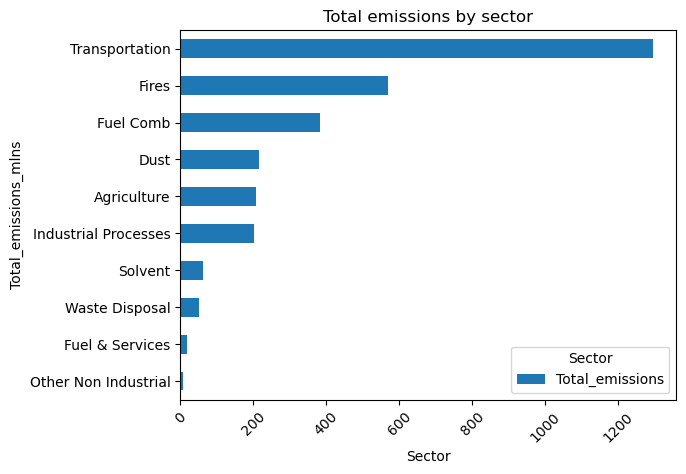

In [18]:
# Plot bar chart
sector_totals.plot(kind='barh', x='Sector', y='Total_emissions')
plt.xlabel('Sector')
plt.ylabel('Total_emissions_mlns')
plt.title('Total emissions by sector')
plt.xticks(rotation=45)
plt.legend(title='Sector')
plt.show()

In [19]:
yearly_emissions = (
    pollution_df
    .groupby(['Year', 'Sector'])['Total_emissions_mlns']
    .sum()
    .reset_index()
)

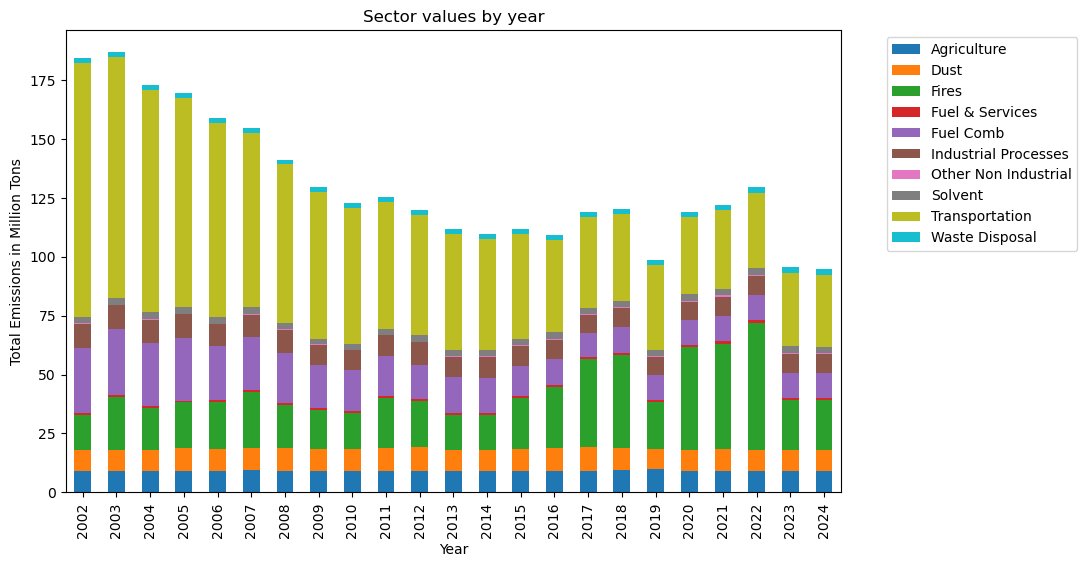

In [20]:
yearly_emissions_pivot = (yearly_emissions
                          .pivot(index='Year', columns='Sector', values='Total_emissions_mlns')
                         )
yearly_emissions_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sector values by year')
plt.ylabel('Total Emissions in Million Tons')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


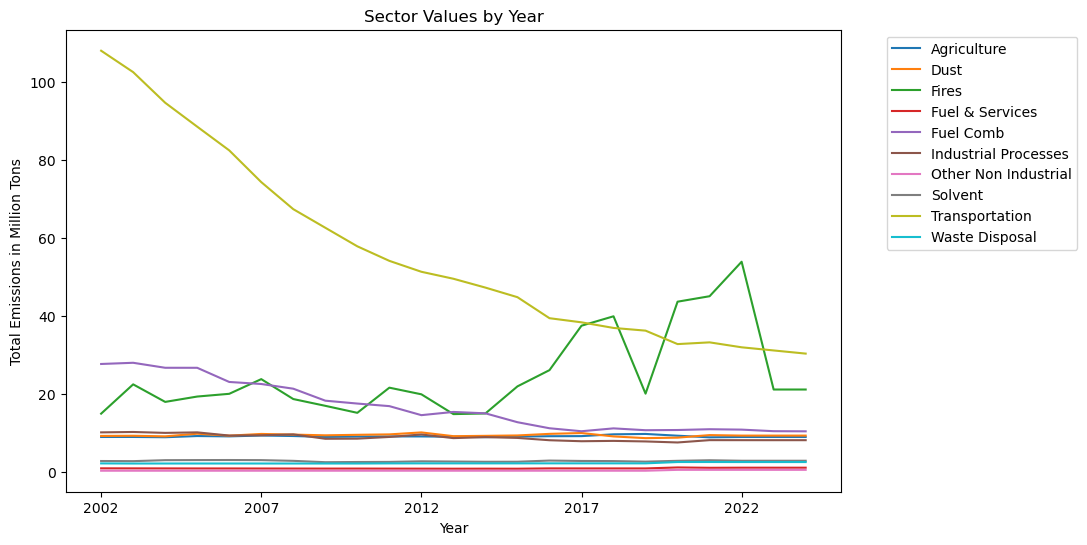

In [21]:
yearly_emissions_pivot.plot(figsize=(10,6))

plt.title('Sector Values by Year')
plt.ylabel('Total Emissions in Million Tons')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
# Filtering only the rows where sevtor is "Transportation"
transportation_df = pollution_df[pollution_df['Sector'] == 'Transportation']
transportation_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
40,AL,Alabama,Black Carbon,Transportation,Aircraft,None,32.739579,-86.843447,2002,114.34297,0.000114
41,AL,Alabama,Black Carbon,Transportation,Marine Transport,None,32.739579,-86.843447,2002,116.46030,0.000116
42,AL,Alabama,Black Carbon,Transportation,Rail Transport,None,32.739579,-86.843447,2002,436.07000,0.000436
43,AL,Alabama,Black Carbon,Transportation,Off Road Equipment,Diesel Machinery,32.739579,-86.843447,2002,2114.34282,0.002114
44,AL,Alabama,Black Carbon,Transportation,Off Road Equipment,Gasoline Machinery,32.739579,-86.843447,2002,114.83016,0.000115


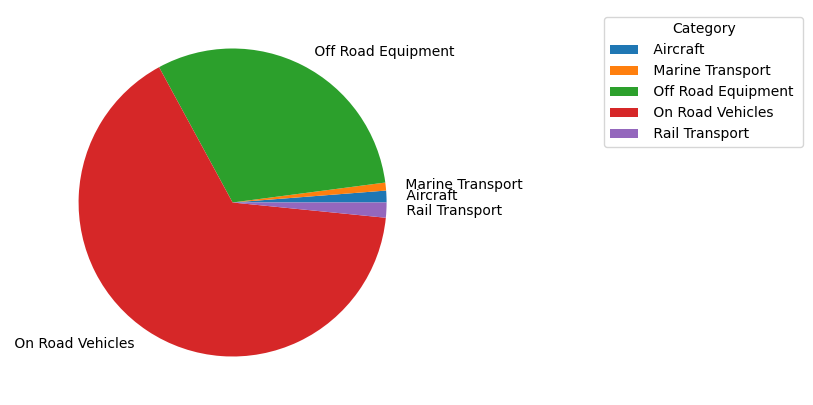

In [23]:
transportation_category_df = (
    transportation_df
    .groupby('Category')['Total_emissions_mlns']
    .sum()
    .reset_index(name='trans_cat_emission')
)

transportation_category_df.set_index('Category').plot.pie(y= 'trans_cat_emission', figsize=(5,5))
plt.legend(loc='upper right', bbox_to_anchor=(2.0, 1.0), title='Category')
plt.ylabel('')
plt.show()

In [24]:
fire_df= pollution_df[pollution_df['Sector']== 'Fires']
fire_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
6,AL,Alabama,Black Carbon,Fires,Agricultural Field Burning,None,32.739579,-86.843447,2002,31.231095,0.000031
7,AL,Alabama,Black Carbon,Fires,Prescribed Fires,None,32.739579,-86.843447,2002,1672.320000,0.001672
8,AL,Alabama,Black Carbon,Fires,Wildfires,None,32.739579,-86.843447,2002,84.727000,0.000085
57,AL,Alabama,CO,Fires,Agricultural Field Burning,None,32.739579,-86.843447,2002,2571.941864,0.002572
58,AL,Alabama,CO,Fires,Prescribed Fires,None,32.739579,-86.843447,2002,571996.610000,0.571997


In [25]:
fire_category_df = (
    fire_df
    .groupby('Category')['Total_emissions_mlns']
    .sum()
    .reset_index(name='fire_tot_emissions')    
    .sort_values(by='fire_tot_emissions', ascending=False)
)
fire_category_df

,Category,fire_tot_emissions
2,Wildfires,285.341798
1,Prescribed Fires,264.984524
0,Agricultural Field Burning,19.146244


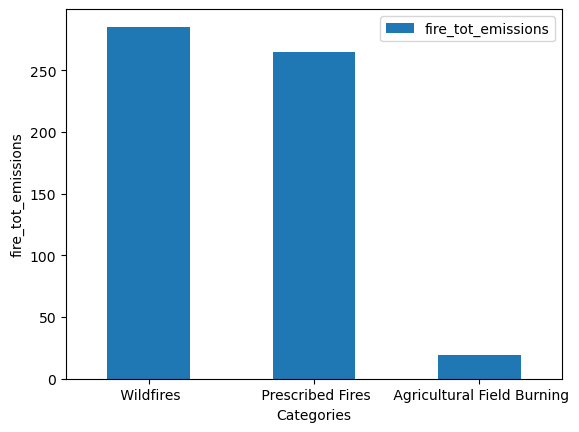

In [26]:
fire_category_df.plot(kind='bar', x='Category', y='fire_tot_emissions', rot=0)
plt.xlabel('Categories')
plt.ylabel('fire_tot_emissions')
plt.show()

In [27]:
fire_state_summary = (
    fire_df
    .groupby('NAME')['Total_emissions_mlns']
    .sum()
    .reset_index(name='fire_total_emissions')
    .sort_values(by='fire_total_emissions', ascending=False)
)
fire_state_summary.head(6).reset_index(drop=True)

,NAME,fire_total_emissions
0,California,62.772343
1,Alaska,61.488403
2,Oregon,54.339796
3,Idaho,27.940958
4,Florida,27.763980
5,Texas,24.513934


In [28]:
fuel_df= pollution_df[pollution_df['Sector']== 'Fuel Comb']
fuel_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
9,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Biomass,32.739579,-86.843447,2002,0.643667,6.436670e-07
10,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Coal,32.739579,-86.843447,2002,0.425113,4.251130e-07
11,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Natural Gas,32.739579,-86.843447,2002,0.835048,8.350484e-07
12,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Oil,32.739579,-86.843447,2002,18.680693,1.868069e-05
13,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Other,32.739579,-86.843447,2002,0.139218,1.392184e-07


In [29]:
fuel_category_df = (
    fuel_df
    .groupby('Category')['Total_emissions_mlns']
    .sum()
    .reset_index(name='fuel_tot_emissions')    
    .sort_values(by='fuel_tot_emissions', ascending=False)
)
fuel_category_df

,Category,fuel_tot_emissions
1,Electric Generation,181.957611
3,Residential,111.371812
2,Industrial Boilers,73.914795
0,Comm/Institutional,14.507129


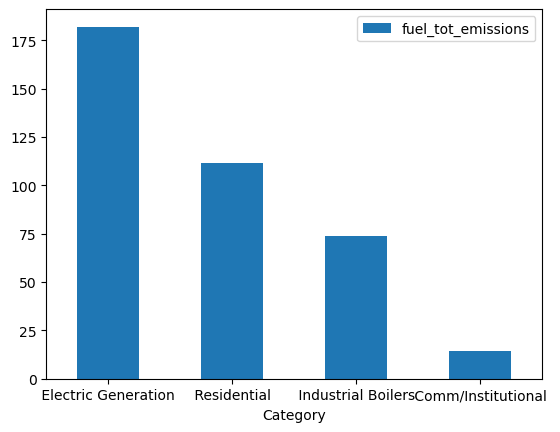

In [30]:
fuel_category_df.plot(kind='bar', x='Category', y='fuel_tot_emissions', rot=0)
plt.show()

In [31]:
fuel_subcategory_df = (
    fuel_df
    .groupby('Subcategory')['Total_emissions_mlns']
    .sum()
    .reset_index(name='fuel_tot_emissions')    
    .sort_values(by='fuel_tot_emissions', ascending=False)
)
fuel_subcategory_df

,Subcategory,fuel_tot_emissions
1,Coal,181.875700
5,Wood,97.290306
2,Natural Gas,52.195949
0,Biomass,19.783341
3,Oil,19.465254
4,Other,11.140797


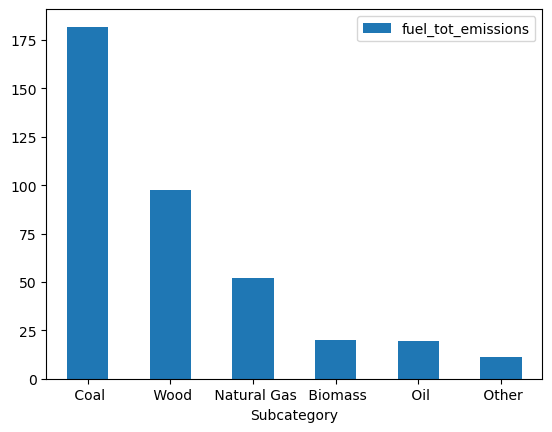

In [32]:
fuel_subcategory_df.plot(kind='bar', x='Subcategory', y='fuel_tot_emissions', rot=0)
plt.show()

In [33]:
pollutants_total = (
    pollution_df
    .groupby('Pollutant')['Total_emissions_mlns']
    .sum()
    .reset_index(name='total_emissions')
    .sort_values(by='total_emissions', ascending=True)
)
pollutants_total.head(9)

,Pollutant,total_emissions
0,Black Carbon,8.214341
4,Organic Carbon,34.954155
2,NH3,107.767197
6,PM25-PRI,120.027632
7,SO2,151.757781
3,NOX,320.795026
8,VOC,351.062547
5,PM10-PRI,389.273946
1,CO,1524.731711


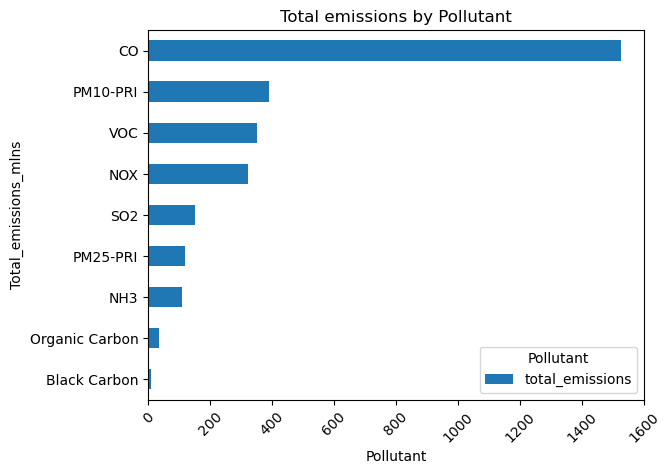

In [34]:
pollutants_total.plot(kind='barh', x='Pollutant', y='total_emissions')
plt.xlabel('Pollutant')
plt.ylabel('Total_emissions_mlns')
plt.title('Total emissions by Pollutant')
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.show()

In [35]:
yearly_emissions = (
    pollution_df
    .groupby(['Year', 'Pollutant'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='tot_emissions')
)

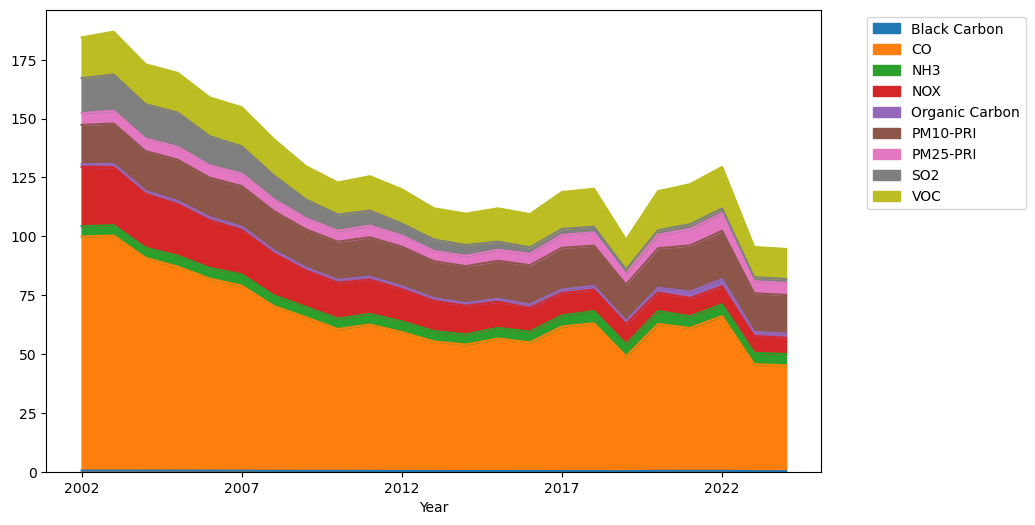

In [36]:
yearly_emissions_pivot = yearly_emissions.pivot(index='Year', columns='Pollutant', values='tot_emissions')
yearly_emissions_pivot.plot(kind='area', stacked=True, figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [37]:
filtered_pollutants = pollution_df.copy()
pollutants_selected = ['CO', 'PM10-PRI', 'PM25-PRI', 'SO2', 'NOX', 'VOC']
filtered_pollutants_df = filtered_pollutants[filtered_pollutants['Pollutant'].isin(pollutants_selected)]

In [38]:
pollutant_sector_df = (
    filtered_pollutants_df
    .groupby(['Pollutant', 'Sector'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='tot_emissions')
)
pollutant_sector_df.head()

,Pollutant,Sector,tot_emissions
0,CO,Agriculture,0.000487
1,CO,Dust,0.002277
2,CO,Fires,364.628882
3,CO,Fuel & Services,1.003353
4,CO,Fuel Comb,103.866855


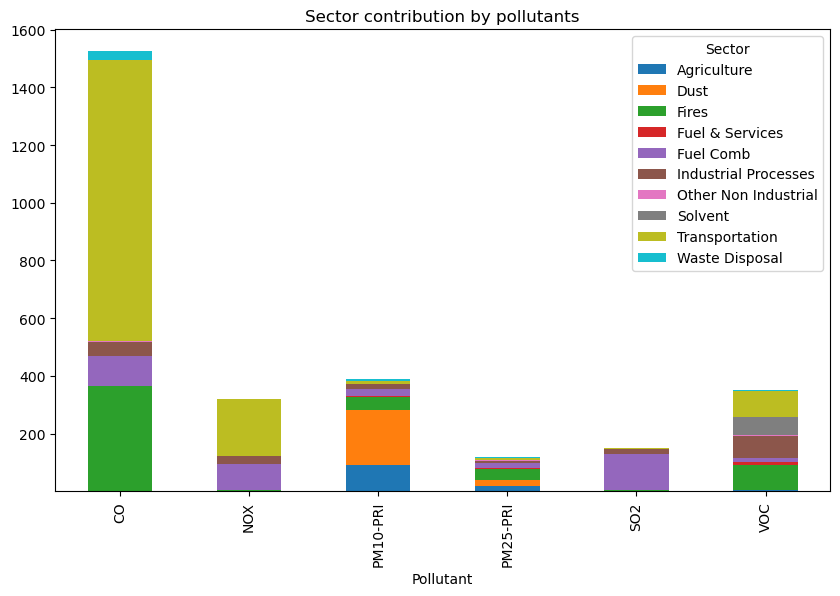

In [39]:
yearly_emissions_pivot= (
    pollutant_sector_df
    .pivot(index='Pollutant', columns='Sector', values='tot_emissions')
)
yearly_emissions_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sector contribution by pollutants')
plt.show()

In [42]:
filtered_pollutants_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
55,AL,Alabama,CO,Fuel & Services,Gasoline Terminals,None,32.739579,-86.843447,2002,3.210200,0.000003
56,AL,Alabama,CO,Fuel & Services,Commercial Cooking,None,32.739579,-86.843447,2002,466.004323,0.000466
57,AL,Alabama,CO,Fires,Agricultural Field Burning,None,32.739579,-86.843447,2002,2571.941864,0.002572
58,AL,Alabama,CO,Fires,Prescribed Fires,None,32.739579,-86.843447,2002,571996.610000,0.571997
59,AL,Alabama,CO,Fires,Wildfires,None,32.739579,-86.843447,2002,28793.369000,0.028793


In [44]:
pollutants_by_year = (
    filtered_pollutants_df
    .groupby(['Year','Pollutant'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='total_pollutants')
)
pollutants_by_year_pivot = pollutants_by_year.pivot(index='Year', columns='Pollutant', values='total_pollutants')
pollutants_by_year_pivot.head()

Pollutant,CO,NOX,PM10-PRI,PM25-PRI,SO2,VOC
Year,,,,,,
2002,99.413029,25.247122,16.668417,4.999307,14.845272,17.332469
2003,99.822408,24.603884,17.210610,5.437938,15.372721,18.173593
2004,90.312131,22.843845,16.892472,5.305312,14.629352,16.970232
2005,86.659361,21.851967,17.582398,5.454899,14.561049,16.856603
2006,81.564713,20.259489,16.780426,5.229968,12.440609,16.466478


<Axes: xlabel='Year'>

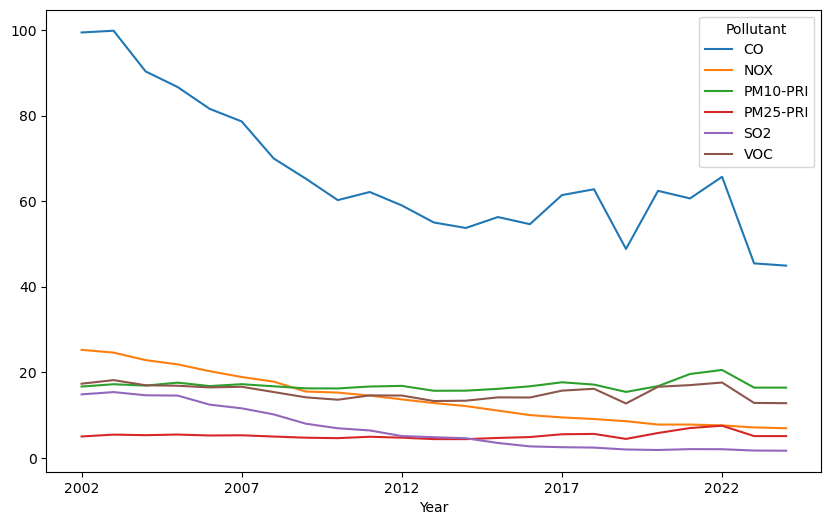

In [45]:
pollutants_by_year_pivot.plot(figsize=(10,6))

In [54]:
top_states = filtered_pollutants_df[filtered_pollutants_df['Pollutant'] == 'CO']
grouped_by_states = (
    top_states
    .groupby('NAME')['Total_emissions_mlns']
    .sum()
    .reset_index(name='total_value')
    .sort_values(by='total_value', ascending=False)
    .head()
)
grouped_by_states

,NAME,total_value
44,Texas,103.156641
4,California,97.805546
9,Florida,93.963290
10,Georgia,60.969898
37,Oregon,53.717343
